# BLOCK 3 : KNN
___

## 1. Requirements

In [ ]:
# !pip3 install -r requirements.txt

## 2. Libraries

In [59]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, f1_score

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


## 3. Open PARQUET File

In [11]:
# Load file .parquet to Pandas DF
# df = pd.read_parquet(r"C:\WORKSPACES\DATA\TRANSFORMED\iNat_Observations_World_Enriched_FRA.parquet")
df = pd.read_parquet(r"iNat_df_croco.parquet")

In [ ]:
# Filter columns
df_croco = df.drop(df.columns[range(9, 14)], axis = 1)

## 4. KNN

### 4.1. Taxa Selection

In [24]:
# All croco
# taxon_ids = [341972, 26085, 26052, 26063, 26068, 26056, 26074, 26044, 26079, 341973, 625424, 26042, 26057, 26081, 26050, 1367403, 26061, 26070, 26076]

# 1st selection
# taxon_ids = [26063, 26056, 26074, 26044, 26079, 26081]

# 2d selection
taxon_ids = [26063, 26044]

df_croco = df_croco[df_croco['taxon_id'].isin(taxon_ids)]


In [25]:
# Save df_filtered
# output_parquet_path = r"C:\WORKSPACES\DATA\TRANSFORMED\iNat_df_croco.parquet"
# df_croco.to_parquet(output_parquet_path, index = False)

In [41]:
# Define two colors for the two unique taxon_ids
colors = ['red', 'blue']

# Create a color map that maps each unique taxon_id to a unique color
unique_taxon_ids = df_croco['taxon_id'].unique()
color_map = dict(zip(unique_taxon_ids, colors))

fig = go.Figure()

# Add a trace for each unique taxon_id
for taxon_id in unique_taxon_ids:
    df_filtered = df_croco[df_croco['taxon_id'] == taxon_id]
    fig.add_trace(go.Scattergeo(
        lon = df_filtered['longitude'],
        lat = df_filtered['latitude'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            color = color_map[taxon_id],
            line = dict(
                width = 1,
                color = "rgba(102, 102, 102)"
            ),
        ),
        name = str(taxon_id)
    ))

fig.update_layout(
    title_text = "2 crocodile species : Crocodile Palustris (26063), Crocodile du Siam (26044)",
    geo = dict(
        scope = "asia",
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
        lataxis = dict(range = [5, 40]),
        lonaxis = dict(range = [60, 110])
    ),
    height = 800
)

# Show map
fig.show()

display(df_croco[['taxon_id', 'scientific_name', 'common_name']].drop_duplicates())

,taxon_id,scientific_name,common_name
42747,26063,Crocodylus palustris,"Crocodile Palustre, Crocodile Des Marais, Croc..."
227979,26044,Crocodylus siamensis,Crocodile Du Siam


### 4.2. Parameters

In [67]:
X = df_croco[["latitude", "longitude"]].values
y = df_croco[["taxon_id"]].values.ravel()


[[ 13   0]
 [  0 167]]


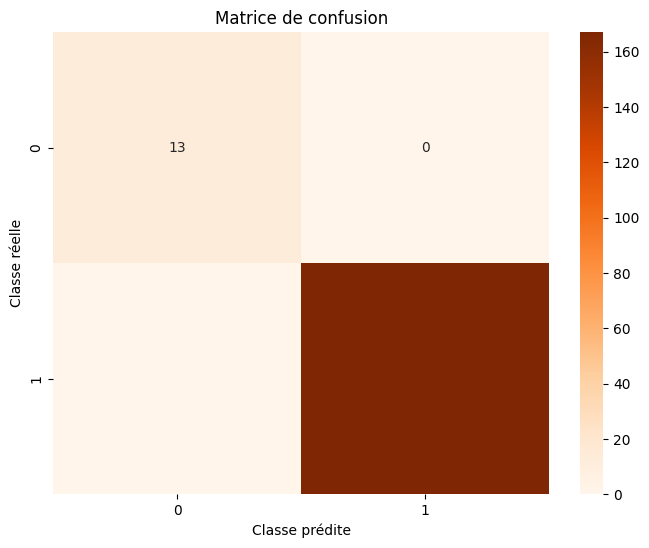

              precision    recall  f1-score   support

       26044       1.00      1.00      1.00        13
       26063       1.00      1.00      1.00       167

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

Accuracy : 100.00%


In [71]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap = "Oranges", fmt="d")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.title("Matrice de confusion")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : {:.2f}%".format(accuracy * 100))


In [61]:
# Create a dictionary that maps taxon_id to scientific_name
taxon_id_to_name = df_croco.drop_duplicates(subset = "taxon_id").set_index("taxon_id")["scientific_name"].to_dict()

def predict_species(knn_model, scaler):
    # Ask the user for latitude and longitude
    latitude = float(input("Please enter latitude: "))
    longitude = float(input("Please enter longitude: "))

    # Create a 2D array with the latitude and longitude
    data = np.array([[latitude, longitude]])

    # Standardize the data
    data = scaler.transform(data)

    # Use the KNN model to make a prediction
    prediction = knn_model.predict(data)

    # Get the scientific_name corresponding to the predicted taxon_id
    scientific_name = taxon_id_to_name[prediction[0]]

    # Print the predicted species
    print(f"The predicted species is: {prediction[0]}, {scientific_name}")

# Use the function
predict_species(knn, scaler)


The predicted species is: 26044, which corresponds to the scientific name: Crocodylus siamensis


## 6. Load

In [ ]:
# Load df_filtered
df_filtered = pd.read_parquet(r"C:\WORKSPACES\DATA\TRANSFORMED\iNat_df_croco.parquet")

In [ ]:
# Some GPS coordonnates
19.592794516848095, 84.18777255922666
16.841290004386707, 103.10407485022739